# Visualizing Earnings Based On College Majors

in this project we will be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. [FiveThirtyEight](https://www.census.gov/programs-surveys/acs/) cleaned the dataset and released it on their [GitHub Repo](https://pages.github.com/).

Using visualizations, we can start to explore questions from the dataset like:

- Do students in more popular majors make more money?
    - Using scatter plots
- How many majors are predominantly male? Predominantly female?
    - Using histograms
- Which category of majors have the most students?
    - Using bar plots

We'll explore how to do these and more while primarily working in pandas. Before we start creating data visualizations, let's import the libraries we need and remove rows containing null values.

In [1]:
# Allow to draw plots inline
%matplotlib inline

# Import libraries
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt

recent_grads = pd.read_csv('data/recent-grads.csv')

Let's output the first row as a table to see what columns do we have and what values do the store.

In [2]:
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

Let's output head and tail to become familiar with how data is structured.

In [3]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [4]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


Let's output the descriptive statistics of the dataset to see if we have missing values.

In [5]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


It seems that we have some missing values in total, men, women columns. As far as we are going to work with Matplotlib, it expects that columns of values we pass in have matching lengths and missing values will cause matplotlib to throw errors. So, let's drop rows that contain null values.

In [6]:
num_of_rows = recent_grads.shape[0]
recent_grads = recent_grads.dropna()
cleaned_num_of_rows = recent_grads.shape[0]
print("Original number of rows: ", num_of_rows)
print("Cleaned number of rows: ", cleaned_num_of_rows)

Original number of rows:  173
Cleaned number of rows:  172


After dropping rows with NULL values, we can see that there was only one row containing NULL values, so now we have a dataset of 172 rows.

Now we can start generating plots. Firstly, let's generate scatter plots answer the following questions:
- Does the median salary depend on the number of total number of people with major?
- Does the median salary depend on the number of empoyed people?
- Does the number of employed depend on the number of low wage jobs?

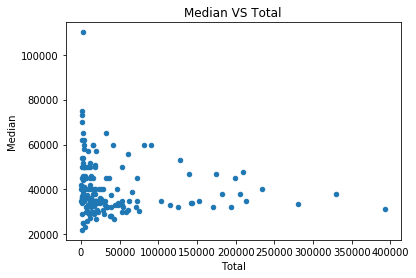

In [7]:
recent_grads.plot(x='Total', y='Median', kind='scatter', title='Median VS Total')

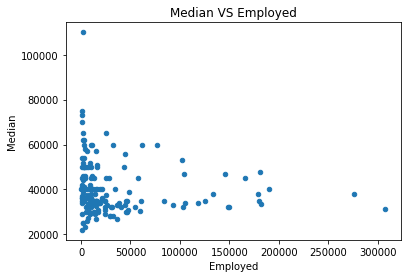

In [8]:
recent_grads.plot(x='Employed', y='Median', kind='scatter', title='Median VS Employed')

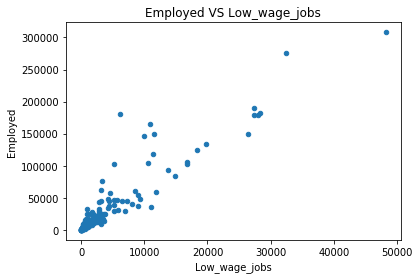

In [9]:
recent_grads.plot(x='Low_wage_jobs', y='Employed', kind='scatter', title='Employed VS Low_wage_jobs')

Overall, we can see that there is a weak correlation between Median VS Total and Median VS Employed, so the median salary does not depend on the total number of people with a major and the number of employed people. However, we can see that there is a strong correlation between the number of employed people and the number of low wage jobs. As the number of employed people with a major is higher as the number of low wage jobs is higher.

Now, let's answer the following questions:
- What is the most common salary?
- What is the most common unemployment rate?

To answer these questions, we need to plot histogram charts.

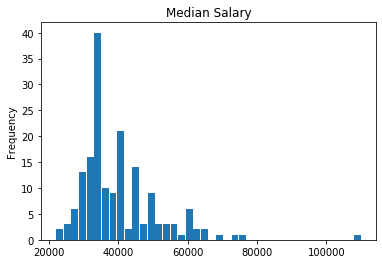

In [10]:
recent_grads['Median'].plot(kind='hist', bins=40, rwidth=0.9, title='Median Salary')

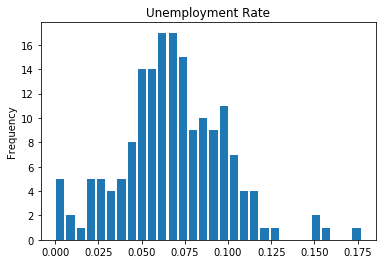

In [11]:
recent_grads['Unemployment_rate'].plot(kind='hist', bins=30, rwidth=0.8, title='Unemployment Rate')

As we can see, the most common wage is around 33000 and the most common unemployment rate is  between 6.5 and 7%.

Sometimes when we are analyzing data, it is quite difficult to scroll through many plots to answer questions we may have. To simplify that, we can use another pandas library - scatter_matrix to plot multiple charts in one scatter matrix.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021749630908>,
      dtype=object)

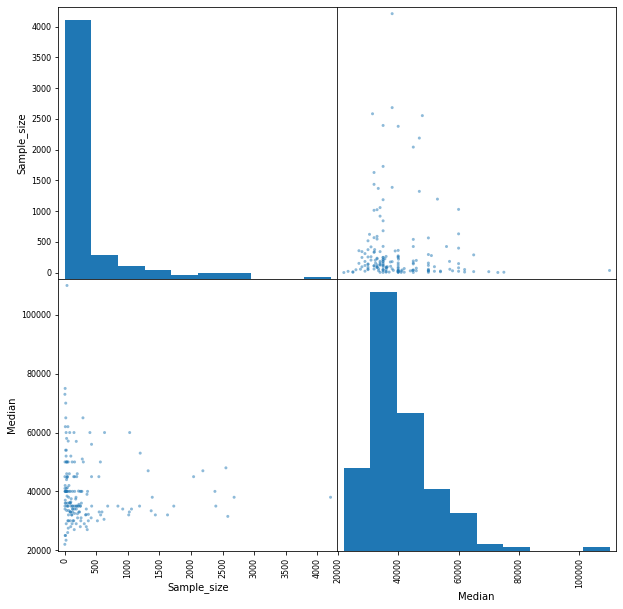

In [12]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002174CA7BDA0>,
      dtype=object)

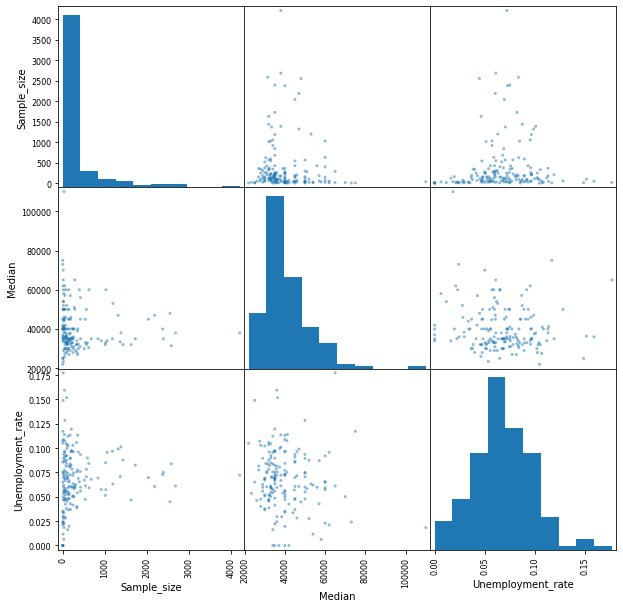

In [13]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

Now let's answer the last couple of questions:
- How differs the women share between first 10 majors and last 10 majors?
- How differs the unemployment rate between first 10 majors and last 10 majors?

To answer these question we will plot some bar 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002174EA12588>,
      dtype=object)

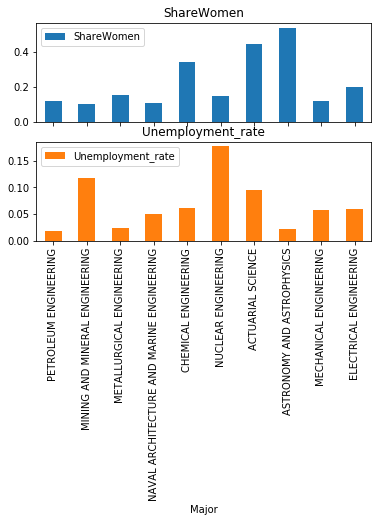

In [32]:
recent_grads[:10].plot.bar(x='Major', y=['ShareWomen', 'Unemployment_rate'], subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002175050A3C8>,
      dtype=object)

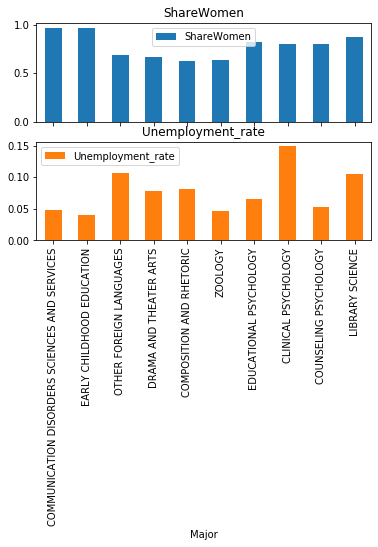

In [33]:
recent_grads[-10:].plot.bar(x='Major', y=['ShareWomen', 'Unemployment_rate'], subplots=True)

Overall, we can see that the unemployment rate for lowest majors is slightly higher than for to 10 ones. Also we can notice that the women share is much more higher for last 10 majors. 